# 2. End-to-end Machine Learning Project

- Main dataset is *California Housing Prices*. 
- Every entry in the dataset indicates a block group (approx. 600 to 3000 people). Therefore features are medians because they are chosen from a sample from the block. 
- Target (response) variable is **median house value**. 
- What is the business objective (**Ticari Hedefimiz ne**)?

## Median House Value Prediction Project

|Dataset Summary  |  | |
|:---|:---|:---|
| **Summary** |  California Housing Prices Dataset  | 20640 data points, 10 features, 1 label (response)|
| **Features** | Feature Name| Description |
| | **longitude** | 	A measure of how far west a house is; a higher value is farther west |
| | **latitude** |	A measure of how far north a house is; a higher value is farther north |	
| | **housingMedianAge** |	Median age of a house within a block; a lower number is a newer building  |
| | **totalRooms** | 	Total number of rooms within a block |
| | **totalBedrooms**| 	Total number of bedrooms within a block |	
| | **population** |	Total number of people residing within a block | 	
| | **households** |	Total number of households, a group of people residing within a home unit, for a block |
| | **medianIncome** | 	Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| | **medianHouseValue** |	Median house value for households within a block (measured in US Dollars) |
| **Model Summary** | |
| **Task** | Predicting median housing price for a block group |**Regression** |
| **Method/ Algorithms**| Multiple Univariate Regression |


   


## Main Libraries

In [48]:
%matplotlib inline
import tarfile
import os
import urllib
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32
from sklearn import datasets

- Current problem is a multiple univariate regression. Here's a list of regression problem classifications

| # of Features | # of Response Variable| Regression Class |
|:---:|:---:|---:|
| Single| Single| Univariable Regression |
| Single| Multiple| Univariable Multivariate Regression |
| Multiple | Single | Multivariable Univariate Regression |
| Multiple | Multiple|  Multivariable Multivariate Regression |

- Loss functions guides the algorithm in a direction to increase performance. The function $h$ is the hypothesis that outputs our prediction. Following is the root mean squared error $(RMSE)$ formula of error:

$$RMSE(\mathrm{X},\mathrm{y}) = \sqrt{\frac{1}{m} \sum_{i=0}^{m} (y^{(i)} - h(x^{(i)})^{2}} \tag{2.1}$$

- This is more sensitive to outliers. If many outliers are present in the data, then next error metric is more useful. Following is the mean absolute error $(MAE)$ formula of error:

$$MAE(\mathrm{X},\mathrm{y}) = \frac{1}{m} \sum_{i=0}^{m} | y^{(i)} - h(x^{(i)})| \tag{2.2}$$

- Norm concept $\| \cdot \|_{p}$ is the generalized version of length ( I disagree about framing it as distance (p. 41), we have a metric for that). The greater the $p$ the more sensitive norm to outliers. Main formula for any norm:
$$\| \mathrm{x} \|_{p} = \left ( \sum_{i=1}^{n} |x_{i}|^{p} \right )^{1/p}  \tag{2.3}$$

> **Remark:** $RMSE$ is said to be more sensitive to outliers than $MAE$. Meaning of this statement is that introducing outlier elements to the vector changes the norm more drastically in $RMSE$ than $MAE$. We can show that experimentally by adding more and more outliers to a vector and calculating the norm. Following code demonstrates that $l_{1}$ norm increases less than $l_{2}$ norm when outliers are added to the vector. Of course, this is only true up to a point and exponential increase in outlier number kicks in after a threshold and $l_{2}$ norm increase starts to die down as opposed to $l_{1}$ norm. </div>

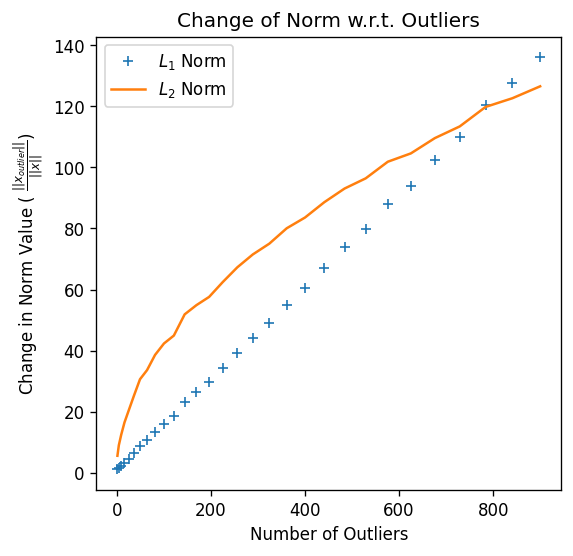

In [219]:
from numpy.linalg import norm

vector_size = 1000
outlier_count = int(np.sqrt(vector_size))
ratios1 = []
ratios2 = []

x = np.random.randint(-100,100,vector_size)

for i in range(1,outlier_count):
    outlier = np.random.randint(5000,10000,i**2)
    x_outlier = x.copy()
    x_outlier[:i**2] = outlier
    ratios1.append(norm(x_outlier,1) / norm(x,1))
    ratios2.append(norm(x_outlier,2) / norm(x,2))

x_values = [i**2 for i in range(1,outlier_count)]
plt.figure(figsize=(5,5),dpi=120)

plt.plot(x_values, ratios1, "+", label=r"$L_{1}$ Norm")
plt.plot(x_values, ratios2, label=r"$L_{2}$ Norm")
plt.xlabel("Number of Outliers")
plt.ylabel(r"Change in Norm Value ($~ \frac{\||x_{outlier}\||}{||x||}$)")
plt.title("Change of Norm w.r.t. Outliers")
plt.legend()
plt.show()

- Median income is capped and divided into quantitative categories.

## Getting Dataset

In [220]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
DATA_PATH = os.path.join("datasets", "housing")
DATA_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(data_url=DATA_URL, data_path=DATA_PATH):
    os.makedirs(data_path, exist_ok=True)
    tgz_path = os.path.join(data_path, "housing.tgz")
    urllib.request.urlretrieve(data_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=data_path)
    housing_tgz.close()
    

def load_housing_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "housing.csv")
    return pd.read_csv(csv_path)


#fetch_housing_data()
housing_original = load_housing_data()
housing = housing_original.copy()


## Dataset Characteristics

In [221]:
housing.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [222]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


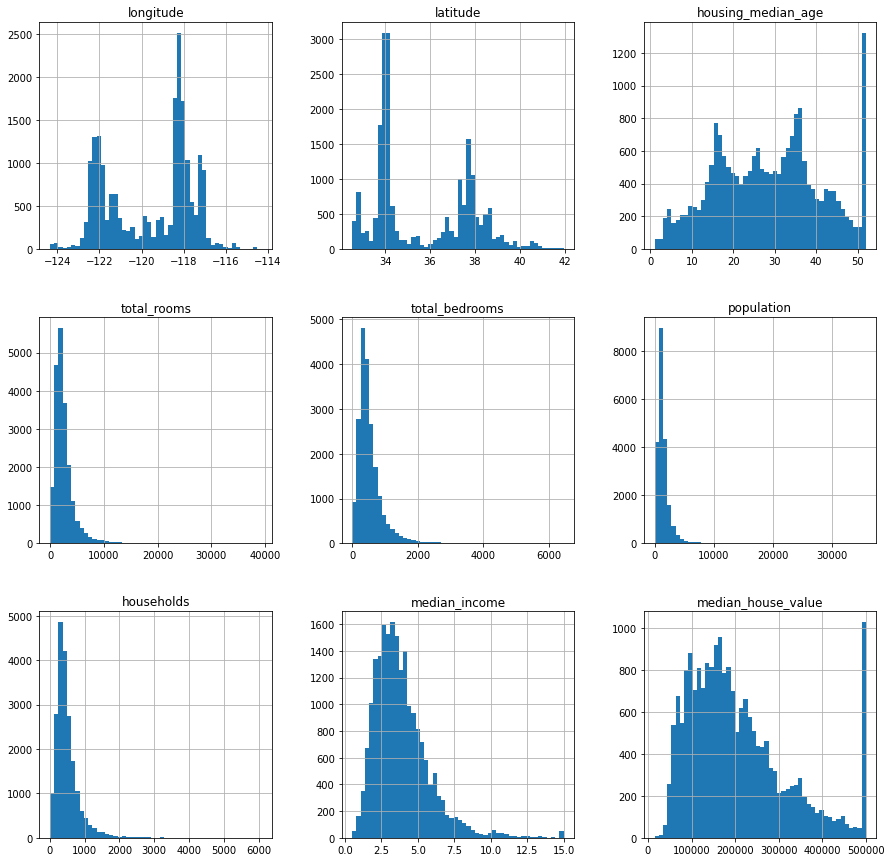

In [223]:
housing.hist(bins=50, figsize=(15,15))
plt.show()

## Dividing dataset into train and test set

- Certain part of dataset needs to be set aside to prevent *data snooping bias* and evaluate final trained model. This is called test set and must be chosen randomly while representing the overall features of original dataset.

In [224]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


def split_train_test_by_id(data, test_ratio, id_column):
    
    from zlib import crc32
    def test_set_check(identifier, test_ratio):
        # 0xffffffff is for compatibility with Python 2 
        return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
    
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set] # iloc doesn't accept boolean mask indexing
  

- You might wonder why `split_train_test_by_id` function doesn't have randomization procedure. The reason behind that cylic redundancy check (crc), `crc32(np.int64(identifier))`, generates uniformly distributed checksums which has the maximum value of `2**32`. Therefore only the percentage of the ratio will be included in test set. Here's an example code producing random test and train set:

In [231]:
from zlib import crc32
import numpy as np

n = 20
train_set = []
test_set = []
ratio = 0.2

for i in range(n):
    if crc32(np.int64(i)) < ratio * 2**32:
        test_set.append(i)
    else:
        train_set.append(i)

print("Train Set:", len(train_set)/n, "\nTest Set", len(test_set)/n)
print("Train set index:\n", train_set)
print("Test set index:\n", test_set)

Train Set: 0.8 
Test Set 0.2
Train set index:
 [0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19]
Test set index:
 [2, 5, 12, 16]


In [232]:
housing_with_id = housing.copy()
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [233]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_with_id, test_size=0.2, random_state=42)

## Sampling with Replacement

- Biased sampling example in the book goes like this:
> " ... If the people running the survey used purely random sampling (1000 people), there would be about a 12% chance of sampling a skewed test set that was either less than 49% female or more than 54% female. 

- Let's calculate this. Even though this is a sampling without replacement and [hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution) needs to be used, it's ok to use [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). They are pretty close when the sample size is adequately big. US population is 48.7% male and 51.3% female, so the probability of a sample point to be male or female are $Pr(\mathcal{M}) = 0.487$ and $Pr(\mathcal{F})=0.513$. Also, probability mass function of binomial distribution is as follows:

$$k \sim p(k) = \binom{N}{k}p^{k} (1-p)^{N-k} \tag{2.4}$$

- If $k$ denotes the number of females in our sample and $p = Pr(\mathcal{F})=0.513$, then we are finding the probability of the event $\mathcal{S} = \{k < 490\} \cup \{540 < k\}$. This equals to subtracting the probability of k being between 490 and 540 from 1 which equals to $11\%$: 

$$1- \sum_{k = 490}^{540} \binom{1000}{k} p^{k} (1-p)^{1000-k} =0.109$$


In [236]:
from scipy.stats import binom

result = 0
N = 1000
p = 0.513

for k in range(490,541):
    
    #prob_choosing_k = binom(N,k) * (p**k) * ((1-p)**(N-k))  
    prob_choosing_k = binom.pmf(k,N,p)
    result += prob_choosing_k 
    
print("Prob. of k less than 49% or more than 54%\nWith Replacement:", 1 - result)

Prob. of k less than 49% or more than 54%
With Replacement: 0.10943014128885709


## Sampling without Replacement

- If we sample without replacement, then we need to use hypergeometric distribution which has the probability mass function as follows:

$$k \sim p(k) = \frac{\binom{n}{k} \binom{M-n}{N-k}}{\binom{M}{N}} \tag{2.5}$$

- If $k$ denotes the number of females in our sample, $M = 328,200,000$ denotes USA population, $n = 168,366,600$ denotes the female population, $N = 1000$ is the sample size, then we are finding the probability of the event $\mathcal{S} = \{k < 490\} \cup \{540 < k\}$. This equals to subtracting the probability of k being between 490 and 540 from 1 which equals to $11\%$: 

$$1 - \sum_{k=490}^{540} \frac{\binom{168366600}{k} \binom{328200000-168366600}{1000-k}}{\binom{328200000}{1000}} = 0.109$$

In [13]:
from scipy.stats import hypergeom

result = 0

N = 1000 # Sample size
M = 328200000 # Whole population
n = 168366600 # Female population

for k in range(490,541):
    
    prob_choosing_k  = hypergeom.pmf(k, M, n, N)
    result += prob_choosing_k 
    
print("Prob. of k less than 49% or more than 54%\nWithout Replacement:", 1 - result)

Prob. of k less than 49% or more than 54%
Without Replacement: 0.10942934631891832


## Sampling with Correct Representation

- `StratifiedShuffleSplit` method preserves sample distribution characteristics for train/test split according to a chosen feature. So we have to decide which feature must be fairly represented in train and test sets. Our subject matter expert (SME) says that `income_cat` is one of the principal features.

> **Remark:** Up to a certain degree, there is a circular logic here. It's very hard for people to buy expensive houses without necessary funds such as income. So it kind of begs to question whether houses are expensive because rich people are buying them or only rich people can afford expensive houses.

In [237]:
housing_with_id["income_cat"] = pd.cut(housing_with_id["median_income"],
                                       bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                                       labels=[1,2,3,4,5])
#housing_with_id["income_cat"].hist(density=True)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_with_id, housing_with_id["income_cat"]):
    strat_train_set = housing_with_id.loc[train_index]
    strat_test_set = housing_with_id.loc[test_index]
    


- `income_cat` was added to differentiate sample distribution characteristics, therefore needs to be dropped after train/test split. Since we can only drop a column once, `try` is invoked.

In [250]:
try:
    
    strat_train_set.drop("income_cat", axis=1, inplace=True)
    strat_test_set.drop("income_cat", axis=1, inplace=True)
    
except KeyError:
    
    print("income_cat feature already dropped")

income_cat feature already dropped


## Visualizing Geographical Data


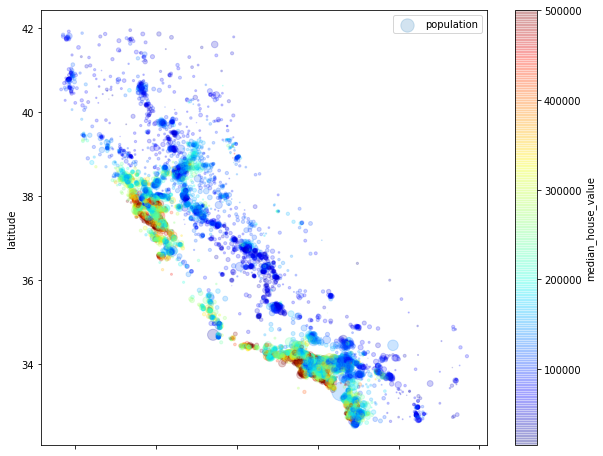

In [251]:
housing = strat_train_set.copy()

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
            s=housing["population"]/100, label="population", figsize=(10,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
            legend=True)
plt.show()

## Representing Correlations

- We can represent every features' relationship with other features using `housing.corr` method. Since our target variable is `"median_house_value`, let's examine the correlation with other features: 



In [252]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
id                    0.047632
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

- Another alternative is `scatter_matrix` method to interpret correlations visually. However, without passing certain features as arguments it calculates the results for every combination of features meaning $n^2$ plots. This is costly.

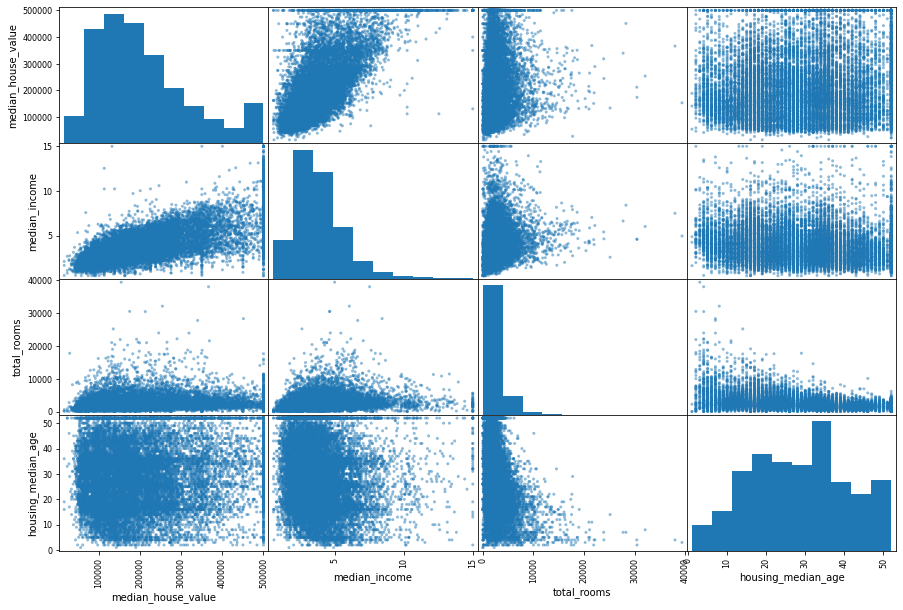

In [253]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", 
              "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15,10))
plt.show()

> **Remark**: If `scatter_matrix()` is invoked without any arguments, 121 plots are drawn for current dataset and a warning is hidden about high memory usage. Since data visualization is an important part of ML, being aware of this is vital.     


- It is possible to obtain `scatter_matrix` result with the following code:

```python
for i in housing.drop("ocean_proximity", axis=1): # "ocean_proximity" not numerical
    for j in housing.drop("ocean_proximity", axis=1):
        housing.plot(kind="scatter", x=i, y=j, alpha=0.1)
```

- Above code outputs the warning message below indicating the memory concerns regarding opening more than 20 figures. If we were to run `scatter_matrix` method without choosing certain features, it still wouldn't warn us about the memory issues. 

<div class="alert alert-block alert-danger"><b></b> RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. </div>

- If you run `time -f "%M" python notebook.py` in terminal, you get the peak memory usage during the execution of the script version of notebook. Final number is in KB:

<img src="fig/chapter2/figure_memory_result1.png" width=500>


- Again running it with closing figures reduces the memory about 70MB


<img src="fig/chapter2/figure_memory_result2.png" width=500>

- Long story short, be on the look out for high memory usage when you are saving hundreds of pictures inside a loop for the next killer paper while leaving plots open.

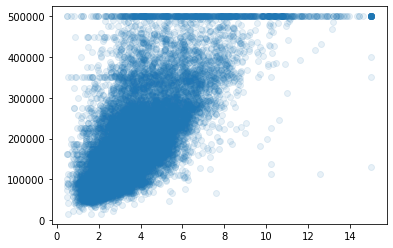

In [254]:
plt.scatter(x=housing["median_income"], y=housing["median_house_value"], alpha=0.1)
plt.show()

## Feature Engineering

- Combining features to obtain more correlation new features is called feature engineering. As the below code yields, `bedrooms_per_room` is more correlated than  any other feature than `median_income`.

In [257]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_households"] = housing["population"] / housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_household          0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
id                           0.047632
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_room           -0.259984
Name: median_house_value, dtype: float64

- Splitting training dataset into features and target. Also, transforming or removing non numeric features.

> **Remark**: `median` value that used to fill in n/a values in any feature needs to be calculated only considering training set to prevent data snooping. 

In [259]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

is_imputing = False

if is_imputing:
    #housing.dropna(subset=["total_bedrooms"]) # Remove rows with NaN values
    #housing.drop("total_bedrooms", axis=1) # Remove columns entirely
    median = housing["total_bedrooms"].median() # Fill NaN values with media
    housing["total_bedrooms"].fillna(median, inplace=True)  # Fill NaN values with media

- Instead of filling `Nan` values manually, we can use `sklearn` imputer class for this step.

In [264]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
X = imputer.fit_transform(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)
housing_num = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_num

[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11950000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54090000e+00
  1.18475925e+05]
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11950000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54090000e+00
  1.18475925e+05]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,121852.71
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,121892.95
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,117167.23
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,119573.69
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,118555.77
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,118095.80
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,117526.12
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,116365.91
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,117976.18


## Dealing with Categorical features

- When you pass the string name of a column to a dataframe for indexing, result is a pandas `series`:

```python
housing_cat = housing["ocean_proximity"]
type(housing_cat)
>>> pandas.core.series.Series
```

- When you pass a list to a dataframe for indexing, result is a `dataframe`:

```python
housing_cat = housing[["ocean_proximity"]]
type(housing_cat)
>>> pandas.core.frame.DataFrame
```

<div class="alert alert-block alert-info"><b>Remark:</b> Following code wouldn't work with a pandas.series, because encoder expects a column vector. Therefore, if an array like data needs to be fed to encoder, it first must be reshaped using for example np.reshape(data, newshape=(-1,1))</div>

In [268]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[["ocean_proximity"]]
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
type(housing_cat_encoded)
housing_cat_encoded


array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [269]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot[:10]


<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

## Custom Transformers

In [272]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:,households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing_num.values)

## Feature Scaling

- Since data points in dataset are vectors composed of features $\mathbf{x}=[x_{1}, \dots, x_{n}]^\intercal$, the whole dataset can be shown with a matrix $\mathbf{X}$: 
$$\mathbf{X} = \begin{bmatrix}
    - \mathbf{x_{1}}^{\intercal} -\\
    ...\\
    - \mathbf{x_{m}}^{\intercal} - \\
   \end{bmatrix}
   \text{ or} = \mathbf{X} = [\mathbf{c_{1}},\cdots,\mathbf{c_{n}}]
   $$
   Therefore a column of the matrix $\mathbf{X} = [\mathbf{c_{1}},\cdots,\mathbf{c_{n}}]$ denotes the feature values of all data points.



- **min-max scaling** (normalization): Given a feature $\mathbf{c_{i}}$, we find $c_{min} = min\{\mathbf{c_{i}}\}$ and $c_{max} = max\{\mathbf{c_{i}}\}$. Then every $c_{i} \in \mathbf{c_{i}}$ is transformed as such:
$$c_{i}' = \frac{c_{i} - c_{min}}{c_{max} - c_{min}}$$

- **standardization**: Given a feature $\mathbf{c_{i}}$, we find mean and standard deviation $\mu_{c}$ and $\sigma_{c}$ respectively. Then every $c_{i} \in \mathbf{c_{i}}$ is transformed as such:
$$c_{i}' = \frac{c_{i} - \mu_{c}}{\sigma_{c}}$$


So far transformation of features are executed individually. During exploration phase, this is practical and favorable. However, when we move on to actually training models which is an iterative process transformation step needs to be automated. This is when pipelines come to the picture.

In [274]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [275]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
print(num_attribs, type(housing_num))

cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'id'] <class 'pandas.core.frame.DataFrame'>


## Select and Train a Model

- First model is linear regression
- Second model is decision tree

In [276]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [277]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [209887.   318823.   211806.75  58907.   189682.5 ]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [278]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE:",lin_rmse)

RMSE: 68624.58603935588


In [279]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [280]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE:",tree_rmse)

RMSE: 0.0


In [290]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [291]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE:",forest_rmse)

RMSE: 18592.331447618104


## Evaluating Models

In [281]:
# Decision Tree Model

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [282]:
tree_rmse_scores.mean(), tree_rmse_scores.std()

(71054.44400434545, 2822.0307615991837)

In [283]:
# Linear Regression Model

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean(), lin_rmse_scores.std()

(69051.5341800177, 2727.307539310845)

In [284]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

#Takes a bit long to train
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring="neg_mean_squared_error", cv=5)

forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores.mean(), lin_rmse_scores.std()

(50292.00414203532, 2727.307539310845)

- Still training error is much smaller meaning overfitting is occurring. 

## Saving Models

In [299]:
import joblib

joblib.dump(forest_reg, "models/forest_reg.pkl")
lin_reg = joblib.load("models/forest_reg.pkl")

## Hyperparameter Tuning

After shortlisting models, we first need to fine tune the capacity of models instead of their parameters. 

In [300]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"n_estimators":[3,10,30], "max_features": [2,4,6,8]},
             {"bootstrap": [False], "n_estimators":[3,10], "max_features":[2,3,4]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [303]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [304]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62299.43575947444 {'max_features': 2, 'n_estimators': 3}
53181.08076228286 {'max_features': 2, 'n_estimators': 10}
50985.297261600004 {'max_features': 2, 'n_estimators': 30}
59009.30273466006 {'max_features': 4, 'n_estimators': 3}
51546.69826511517 {'max_features': 4, 'n_estimators': 10}
48546.150067336945 {'max_features': 4, 'n_estimators': 30}
56872.829677636895 {'max_features': 6, 'n_estimators': 3}
50859.425018519156 {'max_features': 6, 'n_estimators': 10}
48408.864876844265 {'max_features': 6, 'n_estimators': 30}
57406.93365012595 {'max_features': 8, 'n_estimators': 3}
50890.124155653146 {'max_features': 8, 'n_estimators': 10}
48827.47856915689 {'max_features': 8, 'n_estimators': 30}
59672.81296542933 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52130.238515752586 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
57821.73083358348 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
50738.01573964948 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [305]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.04548102e-02, 8.06536449e-02, 3.64591072e-02, 1.66677993e-02,
       1.43033542e-02, 1.75281134e-02, 1.43058701e-02, 3.41637911e-01,
       6.08425658e-02, 5.70072898e-02, 1.02446015e-01, 5.94012175e-02,
       1.38148853e-02, 1.26639036e-01, 1.01042561e-04, 2.13826024e-03,
       5.59907729e-03])

In [306]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse =True)

[(0.3416379110699165, 'median_income'),
 (0.12663903597373857, 'INLAND'),
 (0.10244601515135536, 'pop_per_hhold'),
 (0.08065364490122844, 'latitude'),
 (0.060842565788095784, 'id'),
 (0.05940121750739743, 'bedrooms_per_room'),
 (0.05700728976559137, 'rooms_per_hhold'),
 (0.05045481023047684, 'longitude'),
 (0.03645910724000958, 'housing_median_age'),
 (0.017528113371729874, 'population'),
 (0.01666779928277137, 'total_rooms'),
 (0.014305870148953239, 'households'),
 (0.014303354188256194, 'total_bedrooms'),
 (0.013814885285166589, '<1H OCEAN'),
 (0.005599077290730023, 'NEAR OCEAN'),
 (0.002138260243171485, 'NEAR BAY'),
 (0.00010104256141132063, 'ISLAND')]

## Evaluate Your System on the Test Set

In [307]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

46375.35659887239

In [309]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))


array([44392.78797124, 48276.57584673])